# CSCI 349 Final Project - Modeling
**Authors:** Nick Satriano, Jake Etzler, and Jake Luther  
**Date:** April 26th  
**Semester:** Spring 2023  
**Instructor:** Brian King

In [2]:
# import list
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, auc
import seaborn as sns
import datetime
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

C:\Users\nicks\anaconda3\envs\csci349\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Reading in the data / cleaning it (from DataPrep_EDA file)

In [3]:
# data preprocessing for the PNM stock ticker
ticker = "PNM"

# Get today's date
today = datetime.datetime.now()

# Subtract one day to get yesterday's date
yesterday = today - datetime.timedelta(days=1)

# Format yesterday's date as a string in yyyy-mm-dd format
yesterday_str = yesterday.strftime("%Y-%m-%d")

pnm_raw = yf.download(ticker, start="2010-01-01", end=yesterday_str, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
# data preprocessing for the AXLA ticker
ticker = "AXLA"

# Get today's date
today = datetime.datetime.now()

# Subtract one day to get yesterday's date
yesterday = today - datetime.timedelta(days=1)

# Format yesterday's date as a string in yyyy-mm-dd format
yesterday_str = yesterday.strftime("%Y-%m-%d")

axla_raw = yf.download(ticker, start="2010-01-01", end=yesterday_str, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [6]:
# data preprocessing for the GALT ticker
ticker = "GALT"

# Get today's date
today = datetime.datetime.now()

# Subtract one day to get yesterday's date
yesterday = today - datetime.timedelta(days=1)

# Format yesterday's date as a string in yyyy-mm-dd format
yesterday_str = yesterday.strftime("%Y-%m-%d")

galt_raw = yf.download(ticker, start="2010-01-01", end=yesterday_str, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [5]:
# data preprocessing for the AMZN ticker
ticker = "AMZN"

# Get today's date
today = datetime.datetime.now()

# Subtract one day to get yesterday's date
yesterday = today - datetime.timedelta(days=1)

# Format yesterday's date as a string in yyyy-mm-dd format
yesterday_str = yesterday.strftime("%Y-%m-%d")

amzn_raw = yf.download(ticker, start="2010-01-01", end=yesterday_str, interval='1d')

[*********************100%***********************]  1 of 1 completed


### Prepping the data for modeling

In [7]:
# Prepare PNM data for Prophet model
pnm = pd.DataFrame({'ds': pnm_raw.index, 'y': pnm_raw['Adj Close']})
pnm.reset_index(inplace=True, drop=True)
print('PNM prep completed')

PNM prep completed


In [8]:
# Prepare AXLA ticker data for Prophet model
axla = pd.DataFrame({'ds': axla_raw.index, 'y': axla_raw['Adj Close']})
axla.reset_index(inplace=True, drop=True)
print('AXLA prep completed')

AXLA prep completed


In [9]:
# Prepare GALT ticker data for Prophet model
galt = pd.DataFrame({'ds': galt_raw.index, 'y': galt_raw['Adj Close']})
galt.reset_index(inplace=True, drop=True)
print('GALT prep completed')

GALT prep completed


In [10]:
# Prepare AMZN ticker data for Prophet model
amzn = pd.DataFrame({'ds': amzn_raw.index, 'y': amzn_raw['Adj Close']})
amzn.reset_index(inplace=True, drop=True)
print('AMZN prep completed')

AMZN prep completed


### Create, fit, and generate predictions with model

In [11]:
# Modeling for the PNM ticker
pnm_prophet = Prophet(daily_seasonality=True)

pnm_prophet.fit(pnm)

# Generate predictions for the next 30 days
pnm_future = pnm_prophet.make_future_dataframe(periods=30)
pnm_forecast = pnm_prophet.predict(pnm_future)
print('PNM modeling completed')

01:10:16 - cmdstanpy - INFO - Chain [1] start processing
01:10:17 - cmdstanpy - INFO - Chain [1] done processing


PNM modeling completed


In [12]:
# Modeling for the AXLA ticker
axla_prophet = Prophet(daily_seasonality=True)

axla_prophet.fit(axla)

# Generate predictions for the next 30 days
axla_future = axla_prophet.make_future_dataframe(periods=30)
axla_forecast = axla_prophet.predict(axla_future)
print('AXLA modeling completed')

01:10:18 - cmdstanpy - INFO - Chain [1] start processing
01:10:18 - cmdstanpy - INFO - Chain [1] done processing


AXLA modeling completed


In [13]:
# Modeling for the GALT ticker
galt_prophet = Prophet(daily_seasonality=True)

galt_prophet.fit(galt)

# Generate predictions for the next 30 days
galt_future = galt_prophet.make_future_dataframe(periods=30)
galt_forecast = galt_prophet.predict(galt_future)
print('GALT modeling completed')

01:10:18 - cmdstanpy - INFO - Chain [1] start processing
01:10:19 - cmdstanpy - INFO - Chain [1] done processing


GALT modeling completed


In [14]:
# Modeling for the AMZN ticker
amzn_prophet = Prophet(daily_seasonality=True)

amzn_prophet.fit(amzn)

# Generate predictions for the next 30 days
amzn_future = amzn_prophet.make_future_dataframe(periods=30)
amzn_forecast = amzn_prophet.predict(amzn_future)
print('AMZN modeling completed')

01:10:20 - cmdstanpy - INFO - Chain [1] start processing
01:10:21 - cmdstanpy - INFO - Chain [1] done processing


AMZN modeling completed


### Create plot of model predictions vs. actual over time

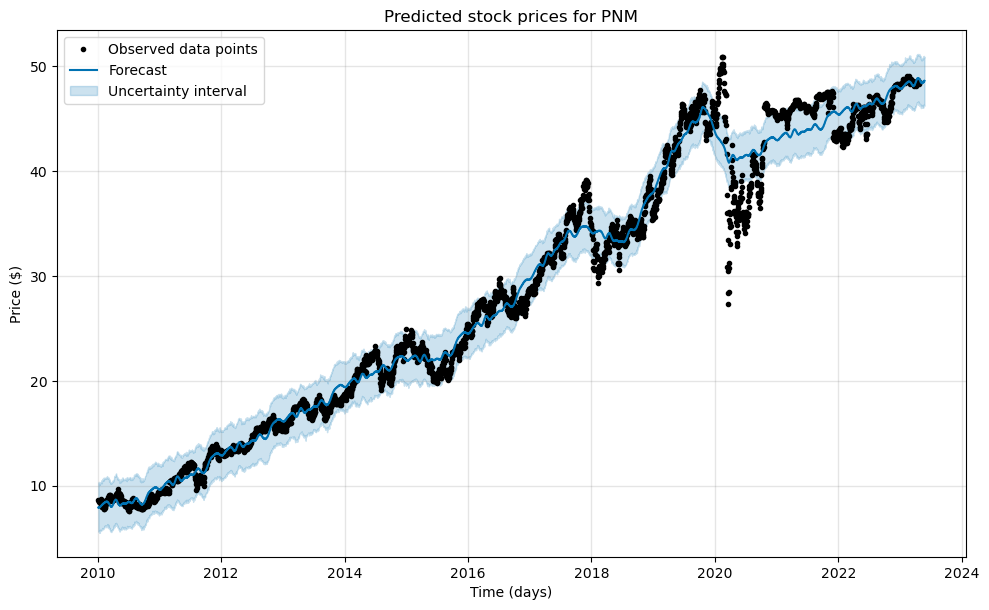

In [15]:
# Plot the predicted prices for PNM
pnm_fig = pnm_prophet.plot(pnm_forecast)
plt.title(f'Predicted stock prices for PNM')
plt.xlabel('Time (days)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

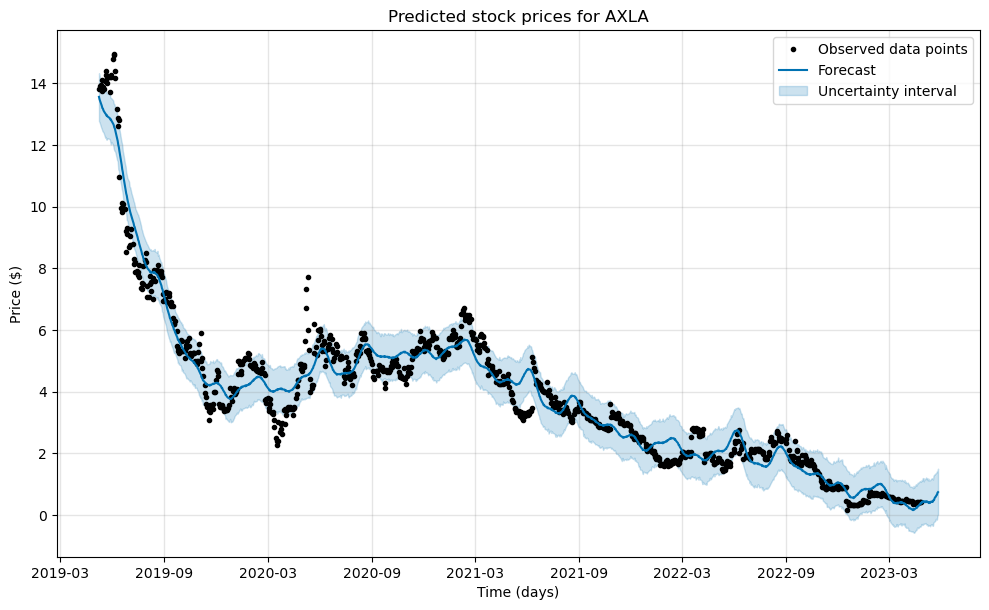

In [16]:
# Plot the predicted prices for AXLA
axla_fig = axla_prophet.plot(axla_forecast)
plt.title(f'Predicted stock prices for AXLA')
plt.xlabel('Time (days)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

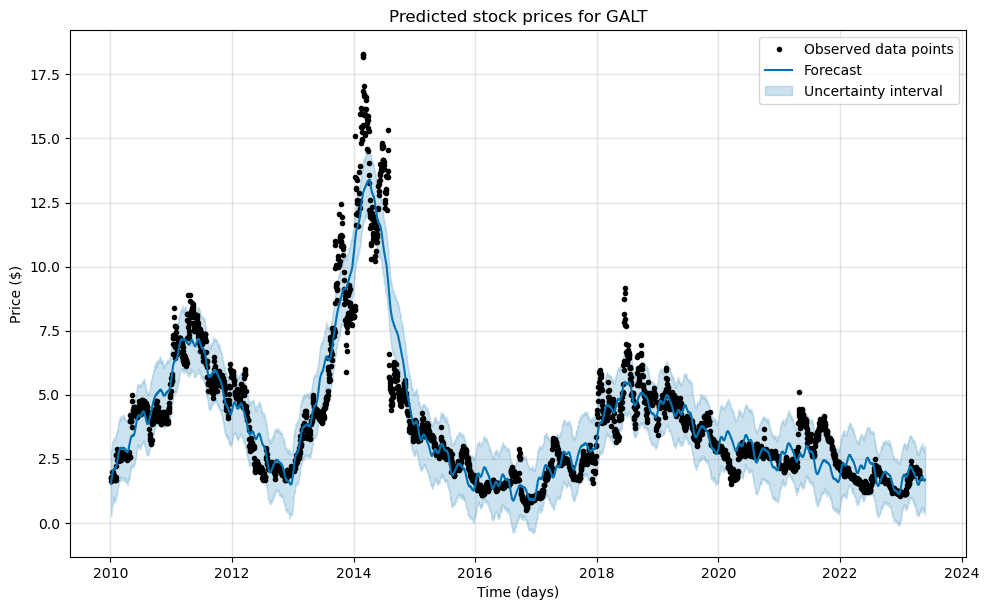

In [17]:
# Plot the predicted prices for GALT
galt_fig = galt_prophet.plot(galt_forecast)
plt.title(f'Predicted stock prices for GALT')
plt.xlabel('Time (days)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

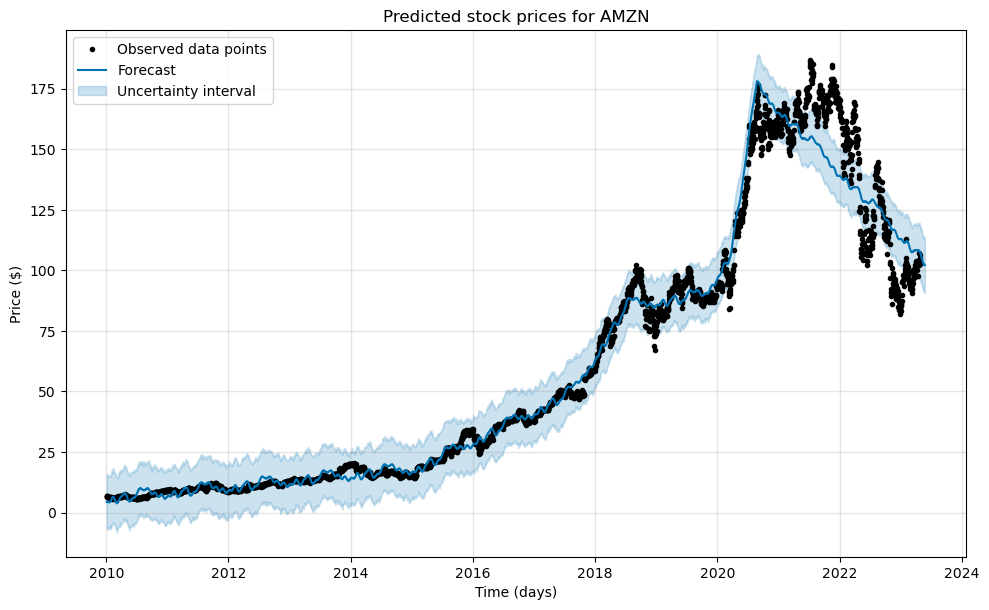

In [18]:
# Plot the predicted prices for AMZN
amzn_fig = amzn_prophet.plot(amzn_forecast)
plt.title(f'Predicted stock prices for AMZN')
plt.xlabel('Time (days)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

### Plotting the model performance over last 3 months with next month of adjusted closing predictions included

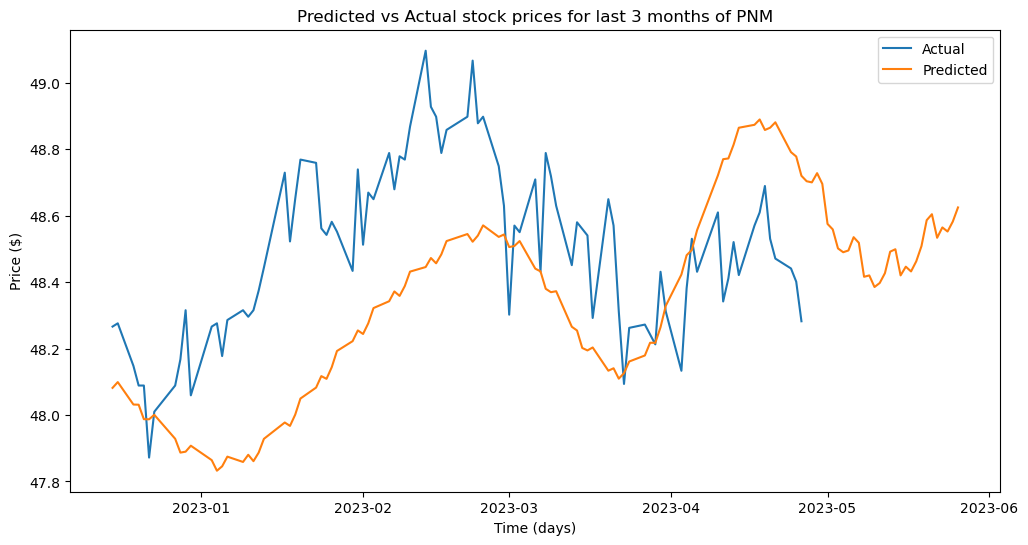

In [19]:
# Plot the predicted vs actual prices for PNM
pnm_last_month = pnm_forecast.iloc[-120:]
pnm_last_month_actual = pnm_raw.iloc[-90:]

pnm_fig2 = plt.figure(figsize=(12,6))
plt.plot(pnm_last_month_actual.index, pnm_last_month_actual['Adj Close'], label='Actual')
plt.plot(pnm_last_month.ds, pnm_last_month.yhat, label='Predicted')
plt.title(f'Predicted vs Actual stock prices for last 3 months of PNM')
plt.xlabel('Time (days)')
plt.ylabel('Price ($)')
plt.autoscale()
plt.legend()
plt.show()

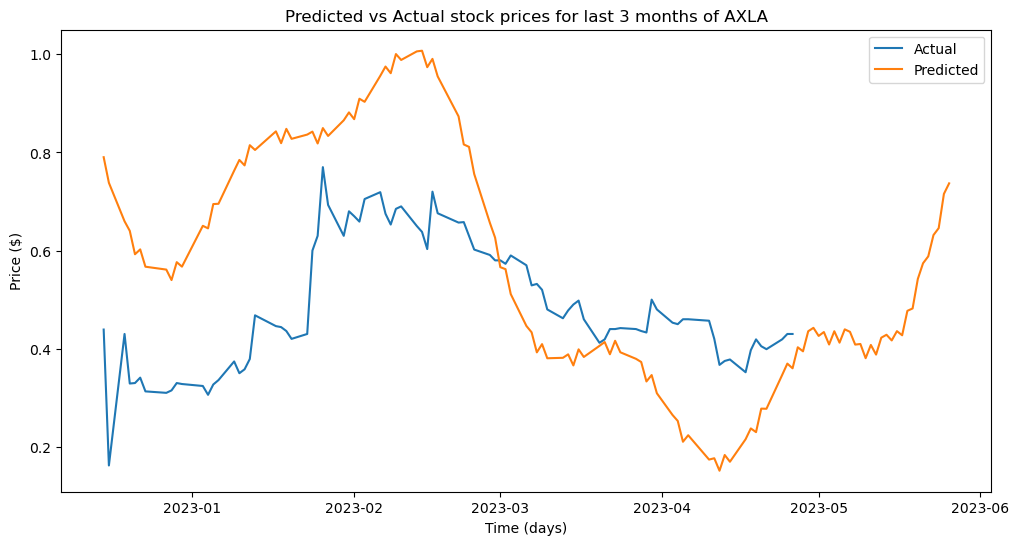

In [20]:
# Plot the predicted vs actual prices for AXLA
axla_last_month = axla_forecast.iloc[-120:]
axla_last_month_actual = axla_raw.iloc[-90:]

axla_fig2 = plt.figure(figsize=(12,6))
plt.plot(axla_last_month_actual.index, axla_last_month_actual['Adj Close'], label='Actual')
plt.plot(axla_last_month.ds, axla_last_month.yhat, label='Predicted')
plt.title(f'Predicted vs Actual stock prices for last 3 months of AXLA')
plt.xlabel('Time (days)')
plt.ylabel('Price ($)')
plt.autoscale()
plt.legend()
plt.show()

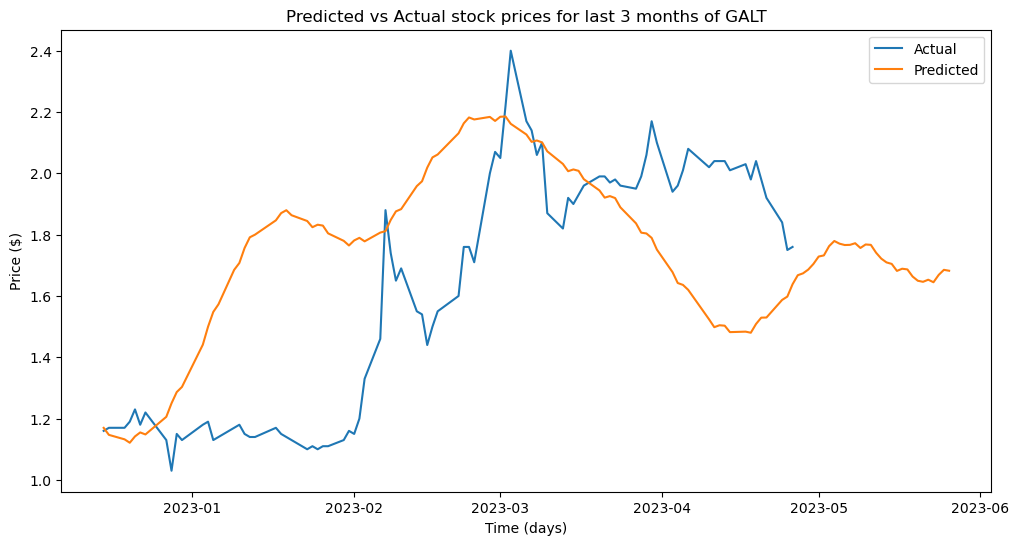

In [21]:
# Plot the predicted vs actual prices for GALT
galt_last_month = galt_forecast.iloc[-120:]
galt_last_month_actual = galt_raw.iloc[-90:]

galt_fig2 = plt.figure(figsize=(12,6))
plt.plot(galt_last_month_actual.index, galt_last_month_actual['Adj Close'], label='Actual')
plt.plot(galt_last_month.ds, galt_last_month.yhat, label='Predicted')
plt.title(f'Predicted vs Actual stock prices for last 3 months of GALT')
plt.xlabel('Time (days)')
plt.ylabel('Price ($)')
plt.autoscale()
plt.legend()
plt.show()

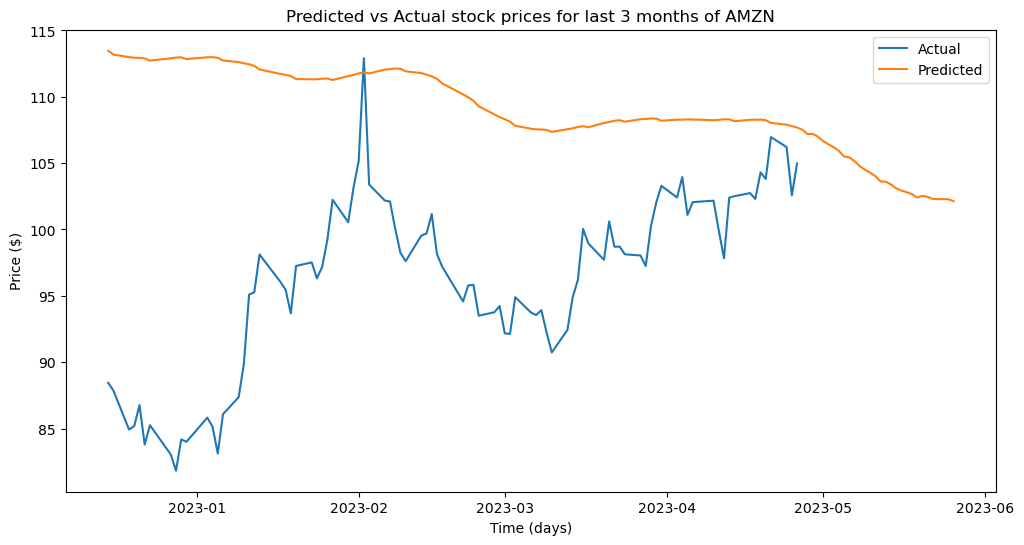

In [22]:
# Plot the predicted vs actual prices for AMZN
amzn_last_month = amzn_forecast.iloc[-120:]
amzn_last_month_actual = amzn_raw.iloc[-90:]

amzn_fig2 = plt.figure(figsize=(12,6))
plt.plot(amzn_last_month_actual.index, amzn_last_month_actual['Adj Close'], label='Actual')
plt.plot(amzn_last_month.ds, amzn_last_month.yhat, label='Predicted')
plt.title(f'Predicted vs Actual stock prices for last 3 months of AMZN')
plt.xlabel('Time (days)')
plt.ylabel('Price ($)')
plt.autoscale()
plt.legend()
plt.show()

### Evaluate model performance using prophet.diagnostics cross_validation

In [ ]:
# Perform cross validation with horizon of 30 days and a sliding window of 1 day
pnm_cv = cross_validation(pnm_prophet, horizon='90 days', period='45 days', initial='730 days', parallel="processes")

# Compute performance metrics
pnm_metrics = performance_metrics(pnm_cv)

# Print performance metrics
pnm_metrics

In [ ]:
# showing the plot of the cross validation metric for the PNM model
pnm_fig3 = plot_cross_validation_metric(pnm_cv, metric='mape')
plt.title("Cross validation metric for the PNM model")
plt.show()

In [70]:
# Perform cross validation with horizon of 30 days and a sliding window of 1 day for AXLA
axla_cv = cross_validation(axla_prophet, horizon='90 days', period='45 days', initial='730 days', parallel="processes")

# Compute performance metrics
axla_metrics = performance_metrics(axla_cv)

# Print performance metrics
axla_metrics

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,0.733479,0.856434,0.616290,0.416952,0.268215,0.347276,0.676744
1,10 days,0.859755,0.927230,0.672259,0.458668,0.289749,0.377909,0.644186
2,11 days,0.913683,0.955868,0.698049,0.484400,0.322557,0.390351,0.623256
3,12 days,0.948701,0.974013,0.718310,0.521130,0.317934,0.406756,0.609302
4,13 days,1.080605,1.039522,0.783627,0.580271,0.413126,0.453035,0.579070
...,...,...,...,...,...,...,...,...
77,86 days,1.882660,1.372101,1.196785,0.916414,0.617711,0.728290,0.372093
78,87 days,1.989937,1.410651,1.213404,0.885146,0.628319,0.740097,0.391860
79,88 days,2.054323,1.433291,1.221172,0.858751,0.627236,0.743947,0.391473
80,89 days,2.133982,1.460816,1.235753,0.897290,0.627610,0.753782,0.400000


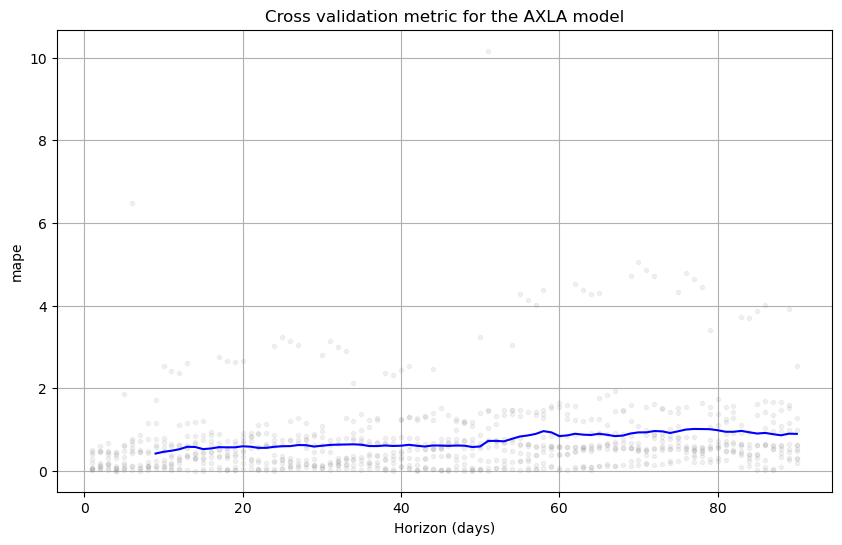

In [71]:
# showing the plot of the cross validation metric for the AXLA model
axla_fig3 = plot_cross_validation_metric(axla_cv, metric='mape')
plt.title("Cross validation metric for the AXLA model")
plt.show()

In [72]:
# Perform cross validation with horizon of 30 days and a sliding window of 1 day for GALT
galt_cv = cross_validation(galt_prophet, horizon='90 days', period='45 days', initial='730 days', parallel="processes")

# Compute performance metrics
galt_metrics = performance_metrics(galt_cv)

# Print performance metrics
galt_metrics

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,2.609793,1.615485,1.142406,0.362324,0.300639,0.402639,0.619288
1,10 days,2.854258,1.689455,1.170958,0.369133,0.302595,0.409382,0.619645
2,11 days,3.135326,1.770685,1.214263,0.378338,0.306652,0.419510,0.611251
3,12 days,3.314927,1.820694,1.240531,0.384931,0.301095,0.426624,0.600862
4,13 days,3.368057,1.835227,1.250101,0.389620,0.304276,0.433968,0.598566
...,...,...,...,...,...,...,...,...
77,86 days,8.460379,2.908673,2.036249,0.655364,0.464527,0.650096,0.449065
78,87 days,8.762408,2.960137,2.046319,0.653543,0.465333,0.649669,0.449821
79,88 days,8.949152,2.991513,2.064906,0.660546,0.465333,0.650925,0.442652
80,89 days,8.765802,2.960710,2.048236,0.660976,0.461412,0.645209,0.435092


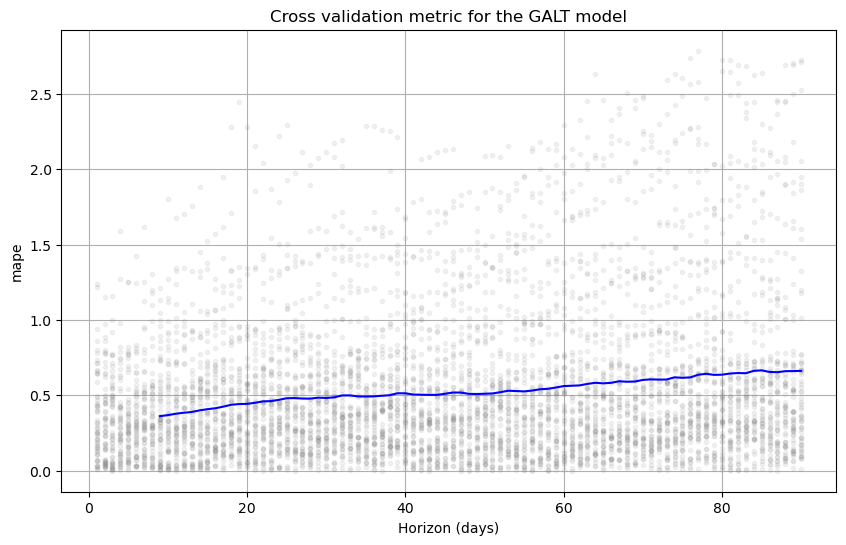

In [73]:
# showing the plot of the cross validation metric for the GALT model
galt_fig3 = plot_cross_validation_metric(galt_cv, metric='mape')
plt.title("Cross validation metric for the GALT model")
plt.show()

In [74]:
# Perform cross validation with horizon of 30 days and a sliding window of 1 day for AMZN
amzn_cv = cross_validation(amzn_prophet, horizon='90 days', period='45 days', initial='730 days', parallel="processes")

# Compute performance metrics
amzn_metrics = performance_metrics(amzn_cv)

# Print performance metrics
amzn_metrics

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,312.862579,17.687922,9.988059,0.117070,0.088145,0.110907,0.268257
1,10 days,327.469852,18.096128,10.214290,0.120581,0.089175,0.113969,0.258889
2,11 days,338.550267,18.399736,10.366374,0.122549,0.091017,0.115864,0.253052
3,12 days,346.724984,18.620553,10.424526,0.123671,0.091017,0.116578,0.253640
4,13 days,351.487155,18.747991,10.489654,0.124989,0.092964,0.117774,0.252688
...,...,...,...,...,...,...,...,...
77,86 days,586.191931,24.211401,14.730877,0.183195,0.158290,0.175396,0.169943
78,87 days,602.993893,24.555934,14.961536,0.185493,0.159952,0.177571,0.164875
79,88 days,607.555432,24.648640,14.950121,0.185705,0.159973,0.178050,0.163082
80,89 days,607.426549,24.646025,14.914809,0.185721,0.159899,0.177959,0.165911


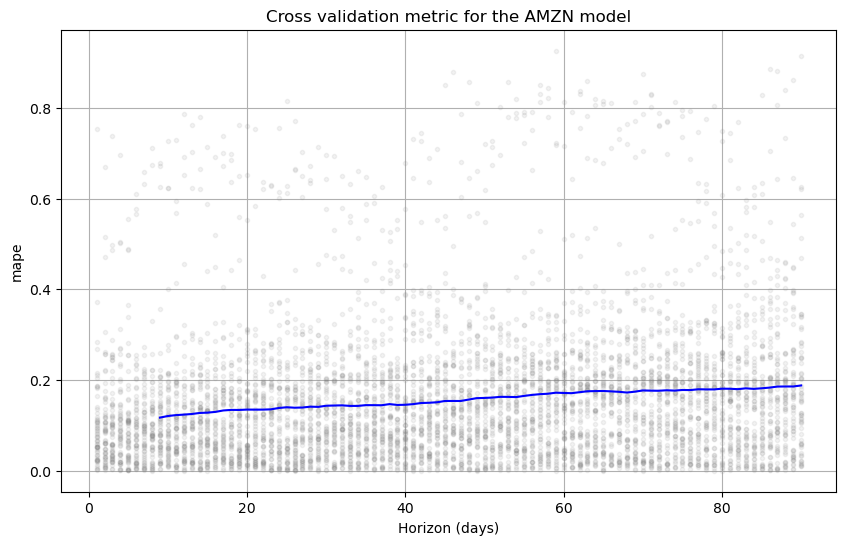

In [75]:
# showing the plot of the cross validation metric for the AMZN model
amzn_fig3 = plot_cross_validation_metric(amzn_cv, metric='mape')
plt.title("Cross validation metric for the AMZN model")
plt.show()